### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [3]:
tf.__version__

'1.13.1'

In [4]:
tf.enable_eager_execution

<function tensorflow.python.framework.ops.enable_eager_execution(config=None, device_policy=None, execution_mode=None)>

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
# Getting the data set.
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [8]:
print(trainX.shape)
testX.shape

(60000, 28, 28)


(10000, 28, 28)

In [9]:
print(trainY.shape)
print(testY.shape)

(60000,)
(10000,)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [10]:
### Using encoding to create new labels and keeping them
train_Y= tf.keras.utils.to_categorical(trainY, num_classes=10)
test_Y = tf.keras.utils.to_categorical(testY, num_classes =10)


In [11]:
print(test_Y.shape)
trainY

(10000, 10)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
print(train_Y.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

### Visualize the data

Plot first 10 images in the triaining set and their labels.

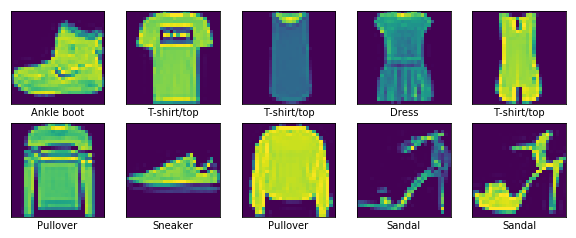

In [15]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i])
    #print(trainY[i])  
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [16]:
from keras.layers import BatchNormalization

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [18]:
# fit the model and run it
model.fit(trainX, train_Y, validation_data=(testX, test_Y), epochs=10)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.8234 - acc: 0.7399 - val_loss: 0.6530 - val_acc: 0.7848
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5914 - acc: 0.8064 - val_loss: 0.5860 - val_acc: 0.8010
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5418 - acc: 0.8214 - val_loss: 0.5495 - val_acc: 0.8158
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5148 - acc: 0.8292 - val_loss: 0.5324 - val_acc: 0.8207
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4973 - acc: 0.8342 - val_loss: 0.5191 - val_acc: 0.8243
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4850 - acc: 0.8378 - val_loss: 0.5094 - val_acc: 0.8266
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sa

In [19]:
model.evaluate(testX, test_Y, verbose=0)

[0.4841083243370056, 0.8325]

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [21]:
#Initialize Sequential model
model_B = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_B.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_B.add(tf.keras.layers.BatchNormalization()) # Batch Normalization

#Add Dense Layer which provides 10 Outputs
model_B.add(tf.keras.layers.Dense(10, activation='softmax')) 


#Comile the model
model_B.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])


### Execute the model

In [22]:
# fit the model and run it after adding batch normalization
model_B.fit(trainX, train_Y, validation_data=(testX, test_Y), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5927 - acc: 0.7958 - val_loss: 0.5067 - val_acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4873 - acc: 0.8305 - val_loss: 0.4841 - val_acc: 0.8322
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4670 - acc: 0.8389 - val_loss: 0.4734 - val_acc: 0.8344
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4561 - acc: 0.8420 - val_loss: 0.4701 - val_acc: 0.8360
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4497 - acc: 0.8442 - val_loss: 0.4713 - val_acc: 0.8340
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4429 - acc: 0.8458 - val_loss: 0.4635 - val_acc: 0.8357
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4398 - acc: 0.8471 - val_loss: 0.

In [23]:
model_B.evaluate(testX, test_Y, verbose=0)


[0.45542032599449156, 0.8419]

In [24]:
model_B.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [25]:
# Setting the learning rate in the optimizer and compiling the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model_B.compile(optimizer=sgd_optimizer,  loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
# fit the model and run it after optimizing the learning rate
model_B.fit(trainX, train_Y, validation_data=(testX, test_Y), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4173 - acc: 0.8545 - val_loss: 0.4510 - val_acc: 0.8430
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4171 - acc: 0.8557 - val_loss: 0.4513 - val_acc: 0.8438
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4142 - acc: 0.8561 - val_loss: 0.4496 - val_acc: 0.8448
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4152 - acc: 0.8542 - val_loss: 0.4505 - val_acc: 0.8434
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4141 - acc: 0.8550 - val_loss: 0.4499 - val_acc: 0.8446
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4145 - acc: 0.8566 - val_loss: 0.4498 - val_acc: 0.8439
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4147 - acc: 0.8565 - val_loss: 0.

In [27]:
model_B.evaluate(testX, test_Y, verbose=0)

[0.44982646222114564, 0.8452]

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [28]:
# Creating the model again with multiple hidden layers.
#Initialize Sequential model again 
model_N = tf.keras.models.Sequential()
model_N.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_N.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model_N.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model_N.add(tf.keras.layers.Dense(100, activation='sigmoid'))


#Add 3rd hidden layer
model_N.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add OUTPUT layer
model_N.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model_N.compile(optimizer=sgd_optimizer,  loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [29]:
model_N.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [30]:
model_N.fit(trainX, train_Y, validation_data=(testX, test_Y), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/sample - loss: 1.8136 - acc: 0.3944 - val_loss: 1.3234 - val_acc: 0.5575
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 1.1227 - acc: 0.6072 - val_loss: 0.9405 - val_acc: 0.6643
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.8430 - acc: 0.7217 - val_loss: 0.7383 - val_acc: 0.7561
Epoch 4/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.6936 - acc: 0.7660 - val_loss: 0.6329 - val_acc: 0.7825
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.6069 - acc: 0.7927 - val_loss: 0.5643 - val_acc: 0.8075
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.5472 - acc: 0.8138 - val_loss: 0.5184 - val_acc: 0.8219
Epoch 7/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5051 - acc: 0.8259 - val_l

In [31]:
model_N.evaluate(testX, test_Y, verbose=0)

[0.42764379436969757, 0.8488]